## Exploring Renovation Potentials: Data-Driven Insights for Renovation Service Providers in Chemnitz

Matrnr.: 8161859, 

### .-1 Setup requirements

- Python version 3.9.18

In [1]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


### 0. Preprocessing

1. Read the datafile into the notebook
2. Extract columns
3. Use only rows with "Chemnitz"
4. Save the dataset into a new file.

In [2]:
import pandas as pd

In [3]:
raw_immo_data = pd.read_csv('./immo_data.csv')

Notes:
- The dataset contains different datatypes but also using whitespraces with "_" but also common whitespaces.
- There are many values with NaN
- Some datafields say NO_Information which is probably similar to NaN?

In [4]:
def extractColumnsFromDataset(dataset):
    filtered = dataset[['regio1', 'newlyConst', 'balcony', 'totalRent', 'yearConstructed', 'hasKitchen', 'baseRent', 'livingSpace', 'condition', 'interiorQual', 'petsAllowed','noRooms', 'thermalChar', 'regio2', 'regio3', 'lastRefurbish', 'date']]
    return filtered

extracted_immo_data = extractColumnsFromDataset(raw_immo_data)
extracted_immo_data.shape

(268850, 17)

In [5]:
def filterRegioForChemnitz(datset):
    chemnitz_rows = datset[datset['regio2'] == 'Chemnitz']
    return chemnitz_rows

chemnitz_rows = filterRegioForChemnitz(extracted_immo_data)
chemnitz_rows.shape

(12575, 17)

In [6]:
def saveToCsv(dataset):
    dataset.to_csv('outData.csv', sep="\t", index=False)

saveToCsv(chemnitz_rows)

In [7]:
chemnitz_in = pd.read_csv('./outData.csv', delimiter="\t")
chemnitz_in.shape
chemnitz_in

,regio1,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,petsAllowed,noRooms,thermalChar,regio2,regio3,lastRefurbish,date
0,Sachsen,False,True,307.00,1930.0,False,219.00,40.20,NaN,normal,NaN,2.0,123.0,Chemnitz,Sonnenberg,NaN,Oct19
1,Sachsen,False,True,501.00,NaN,False,340.00,65.00,fully_renovated,normal,yes,3.0,NaN,Chemnitz,Lutherviertel,NaN,Oct19
2,Sachsen,False,True,425.00,1909.0,True,280.00,53.12,well_kept,normal,negotiable,2.0,153.0,Chemnitz,Bernsdorf,2014.0,Feb20
3,Sachsen,False,True,760.00,1998.0,True,560.00,115.00,NaN,NaN,NaN,5.0,NaN,Chemnitz,Sonnenberg,2000.0,Oct19
4,Sachsen,False,False,715.00,1920.0,False,515.00,102.30,well_kept,NaN,NaN,3.0,NaN,Chemnitz,Zentrum,1995.0,Oct19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12570,Sachsen,False,False,293.00,1895.0,False,198.00,43.00,NaN,normal,NaN,2.0,96.0,Chemnitz,Kappel,NaN,Feb20
12571,Sachsen,False,True,444.00,NaN,False,314.00,59.00,fully_renovated,sophisticated,negotiable,2.0,NaN,Chemnitz,Schloßchemnitz,NaN,May19
12572,Sachsen,True,True,799.88,2018.0,False,611.88,91.13,refurbished,sophisticated,negotiable,3.0,NaN,Chemnitz,Gablenz,2018.0,May19
12573,Sachsen,False,True,326.00,NaN,False,222.00,47.34,fully_renovated,normal,negotiable,1.0,NaN,Chemnitz,Kaßberg,NaN,May19


### 1. Business Understanding

Business Understanding:
 - Was sind die Ziele auf Geschäftsebene?
 - Welche Anforderungen an das Ergebnis gibt
es?
- Welche offenen Fragen sollen beantwortet werden?
- Wie könnten beispielhafte Antworten oder Ergebnisse aussehen?

Data Understanding:
- Welche Daten liegen vor?
- Wie sehen diese aus? Könnte es Probleme mit den Daten geben?
- Kann man »auf den ersten Blick« bereits Zusammenhänge erkennen?
- Wie könnten beispielhafte Antworten oder Ergebnisse aussehen?

Data Preperation:
- Können die Daten in der vorliegenden Form
verwendet werden? (meistens: nein)
- Wie können diese vorverarbeitet werden, um sie zu verwenden?

Modelling:
- Welche Verfahren lösen mein Problem?
- Wie kann man die Verfahren verbessern?
- Welche Alternativen gibt es?
- Achtung: Es gibt unter Umständen einen (sehr starken) Zusammenhang mit Data Preparation -> Iterationszyklen

Evaluation:
- Welches Verfahren ist am Besten?
- Beantwortet es die Fragen aus dem Geschäftsverstehen?

Deployment:
- Wie können die Ergebnisse präsentiert
werden?
- Wie können die Ergebnisse integriert werden?

### 2. Data Exploration und Analyse

#### Erste Analyse und Betrachtung

In [10]:
# Header der Daten
chemnitz_in.columns

Index(['regio1', 'newlyConst', 'balcony', 'totalRent', 'yearConstructed',
       'hasKitchen', 'baseRent', 'livingSpace', 'condition', 'interiorQual',
       'petsAllowed', 'noRooms', 'thermalChar', 'regio2', 'regio3',
       'lastRefurbish', 'date'],
      dtype='object')

In [11]:
# Größe der Datentabelle
chemnitz_in.shape

(12575, 17)

In [12]:
# Stichprobe 60-sten Datensatz aus der Liste
chemnitz_in.iloc[60]
# Beispielsweise sind in dieser Stichprobe einige Werte nicht sinnvoll:
# - lastRefurbish hat einen NaN-Wert
# - Date ist kein sinvoll verwendbares Datum
# - yearConstructed ist in Datentyp Float

regio1                    Sachsen
newlyConst                  False
balcony                     False
totalRent                   313.8
yearConstructed            1996.0
hasKitchen                   True
baseRent                    209.2
livingSpace                 46.49
condition               well_kept
interiorQual               normal
petsAllowed            negotiable
noRooms                       1.0
thermalChar                  82.8
regio2                   Chemnitz
regio3             Schloßchemnitz
lastRefurbish                 NaN
date                        Sep18
Name: 60, dtype: object

In [13]:
chemnitz_in[['regio1', "totalRent"]]

,regio1,totalRent
0,Sachsen,307.00
1,Sachsen,501.00
2,Sachsen,425.00
3,Sachsen,760.00
4,Sachsen,715.00
...,...,...
12570,Sachsen,293.00
12571,Sachsen,444.00
12572,Sachsen,799.88
12573,Sachsen,326.00


In [14]:
# Hier fällt auf, das Total Rent eine Range von 0.0 bis NaN hat.
chemnitz_in.sort_values('totalRent')

,regio1,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,petsAllowed,noRooms,thermalChar,regio2,regio3,lastRefurbish,date
6108,Sachsen,False,False,0.0,1910.0,True,0.0,62.00,well_kept,normal,negotiable,2.0,105.3,Chemnitz,Sonnenberg,1995.0,May19
10005,Sachsen,False,True,0.0,1925.0,False,275.0,54.20,NaN,NaN,NaN,2.0,116.3,Chemnitz,Sonnenberg,NaN,Sep18
6359,Sachsen,False,False,0.0,1900.0,False,230.0,41.10,NaN,NaN,NaN,2.0,NaN,Chemnitz,Bernsdorf,NaN,May19
4109,Sachsen,False,True,0.0,NaN,False,0.0,95.10,NaN,NaN,NaN,2.0,NaN,Chemnitz,Hutholz,NaN,Oct19
11463,Sachsen,False,True,1.0,NaN,False,459.0,70.60,first_time_use_after_refurbishment,sophisticated,negotiable,3.0,NaN,Chemnitz,Zentrum,2018.0,May19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12475,Sachsen,False,True,NaN,1900.0,False,335.0,67.00,well_kept,normal,NaN,2.0,110.8,Chemnitz,Lutherviertel,1996.0,Sep18
12507,Sachsen,False,False,NaN,1900.0,False,370.0,74.00,mint_condition,NaN,NaN,3.0,126.0,Chemnitz,Gablenz,1995.0,May19
12515,Sachsen,False,False,NaN,1915.0,False,243.0,52.80,fully_renovated,NaN,negotiable,2.0,102.0,Chemnitz,Siegmar,NaN,May19
12525,Sachsen,False,True,NaN,1985.0,False,256.0,51.15,refurbished,NaN,negotiable,2.0,65.0,Chemnitz,Reichenbrand,NaN,Feb20


In [15]:
# Describe ergibt hier wenig sinn, da die Tabelle noch nicht aufbereitet ist.
# Es ist aber klar, dass eine totalRent von 0 nicht sinnvoll ist
# Zudem ist unklar, was noRooms aussagt.
chemnitz_in.describe()

,totalRent,yearConstructed,baseRent,livingSpace,noRooms,thermalChar,lastRefurbish
count,11388.000000,8811.000000,12575.000000,12575.000000,12575.000000,8351.000000,2826.000000
mean,458.504498,1935.814323,325.567874,62.503412,2.496619,104.832891,2007.629866
std,190.452234,35.971830,149.273900,25.842287,8.936825,57.348972,10.050789
min,0.000000,1862.000000,0.000000,0.000000,1.000000,18.000000,1900.000000
25%,350.000000,1908.000000,245.000000,49.560000,2.000000,84.380000,1998.000000
50%,420.000000,1920.000000,295.000000,59.030000,2.000000,100.000000,2010.000000
75%,500.000000,1968.000000,357.000000,70.000000,3.000000,117.365000,2018.000000
max,2536.000000,2020.000000,2072.000000,1717.740000,999.990000,1983.000000,2021.000000


In [19]:
# Alle Zeilen mit NaNs löschen:
chemnitz_in.dropna(axis = 0)
# Nur 955 Zeilen besitzen keine NaN Werte :o This is shit!

,regio1,newlyConst,balcony,totalRent,yearConstructed,hasKitchen,baseRent,livingSpace,condition,interiorQual,petsAllowed,noRooms,thermalChar,regio2,regio3,lastRefurbish,date
2,Sachsen,False,True,425.0,1909.0,True,280.0,53.12,well_kept,normal,negotiable,2.0,153.00,Chemnitz,Bernsdorf,2014.0,Feb20
26,Sachsen,False,True,315.0,1961.0,False,225.0,45.28,refurbished,normal,negotiable,2.0,64.00,Chemnitz,Sonnenberg,1997.0,Sep18
36,Sachsen,False,True,498.0,1910.0,False,350.0,74.00,refurbished,normal,negotiable,3.0,142.00,Chemnitz,Hilbersdorf,1998.0,Feb20
43,Sachsen,False,True,1340.0,2015.0,False,1050.0,146.00,first_time_use_after_refurbishment,sophisticated,negotiable,4.0,120.10,Chemnitz,Siegmar,2015.0,Feb20
56,Sachsen,False,True,364.0,1930.0,False,250.0,47.30,refurbished,sophisticated,negotiable,2.0,114.40,Chemnitz,Gablenz,2007.0,May19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12519,Sachsen,False,True,530.0,1920.0,True,380.0,72.00,mint_condition,sophisticated,negotiable,3.0,78.00,Chemnitz,Hilbersdorf,1998.0,Sep18
12524,Sachsen,False,False,499.0,1904.0,False,365.0,77.00,first_time_use_after_refurbishment,sophisticated,negotiable,5.0,69.00,Chemnitz,Hilbersdorf,2018.0,Sep18
12544,Sachsen,False,False,574.0,1900.0,True,399.0,74.59,well_kept,sophisticated,negotiable,3.0,113.83,Chemnitz,Schloßchemnitz,2013.0,May19
12556,Sachsen,False,True,515.0,1900.0,True,350.0,65.97,well_kept,sophisticated,negotiable,3.0,113.83,Chemnitz,Schloßchemnitz,1992.0,Feb20


In [20]:
# Alle Spalten mit NaNs löschen:
chemnitz_in.dropna(axis = 1)
# 10 Spalten besitzen keine NaN Werte, aber 7 schon. I dont like this!

,regio1,newlyConst,balcony,hasKitchen,baseRent,livingSpace,noRooms,regio2,regio3,date
0,Sachsen,False,True,False,219.00,40.20,2.0,Chemnitz,Sonnenberg,Oct19
1,Sachsen,False,True,False,340.00,65.00,3.0,Chemnitz,Lutherviertel,Oct19
2,Sachsen,False,True,True,280.00,53.12,2.0,Chemnitz,Bernsdorf,Feb20
3,Sachsen,False,True,True,560.00,115.00,5.0,Chemnitz,Sonnenberg,Oct19
4,Sachsen,False,False,False,515.00,102.30,3.0,Chemnitz,Zentrum,Oct19
...,...,...,...,...,...,...,...,...,...,...
12570,Sachsen,False,False,False,198.00,43.00,2.0,Chemnitz,Kappel,Feb20
12571,Sachsen,False,True,False,314.00,59.00,2.0,Chemnitz,Schloßchemnitz,May19
12572,Sachsen,True,True,False,611.88,91.13,3.0,Chemnitz,Gablenz,May19
12573,Sachsen,False,True,False,222.00,47.34,1.0,Chemnitz,Kaßberg,May19


In [27]:
# "unique Werte" einer Spalte
chemnitz_in.value_counts()

regio1   newlyConst  balcony  totalRent  yearConstructed  hasKitchen  baseRent  livingSpace  condition       interiorQual   petsAllowed  noRooms  thermalChar  regio2    regio3          lastRefurbish  date 
Sachsen  False       True     464.0      1904.0           False       314.0     68.39        well_kept       normal         negotiable   3.0      118.40       Chemnitz  Bernsdorf       1999.0         Feb20    2
                     False    515.0      1905.0           True        385.0     60.00        refurbished     normal         negotiable   2.0      81.00        Chemnitz  Kaßberg         2012.0         Feb20    2
                              313.0      1907.0           False       223.0     44.64        refurbished     sophisticated  negotiable   2.0      59.00        Chemnitz  Sonnenberg      2011.0         May19    2
                     True     613.0      1900.0           False       438.0     87.57        refurbished     sophisticated  negotiable   4.0      67.10        Ch

In [26]:
# Anteil der "unique Werte"
chemnitz_in.value_counts(normalize = True)

regio1   newlyConst  balcony  totalRent  yearConstructed  hasKitchen  baseRent  livingSpace  condition       interiorQual   petsAllowed  noRooms  thermalChar  regio2    regio3          lastRefurbish  date 
Sachsen  False       True     464.0      1904.0           False       314.0     68.39        well_kept       normal         negotiable   3.0      118.40       Chemnitz  Bernsdorf       1999.0         Feb20    0.002094
                     False    515.0      1905.0           True        385.0     60.00        refurbished     normal         negotiable   2.0      81.00        Chemnitz  Kaßberg         2012.0         Feb20    0.002094
                              313.0      1907.0           False       223.0     44.64        refurbished     sophisticated  negotiable   2.0      59.00        Chemnitz  Sonnenberg      2011.0         May19    0.002094
                     True     613.0      1900.0           False       438.0     87.57        refurbished     sophisticated  negotiable   4.0

#### Erste Grafische Auswertung

In [31]:
%pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 2.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 7.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.4/242.4 kB 6.8 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 7.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 7.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Objective: Übersicht über den Datensatz in grafischer Form

- #KR1: Boxplot
- #KR2: Histogram
- #KR3: Scatter Matrix
- #KR4: Heatmap

In [32]:
import matplotlib.pyplot as plt

##### Histogramme

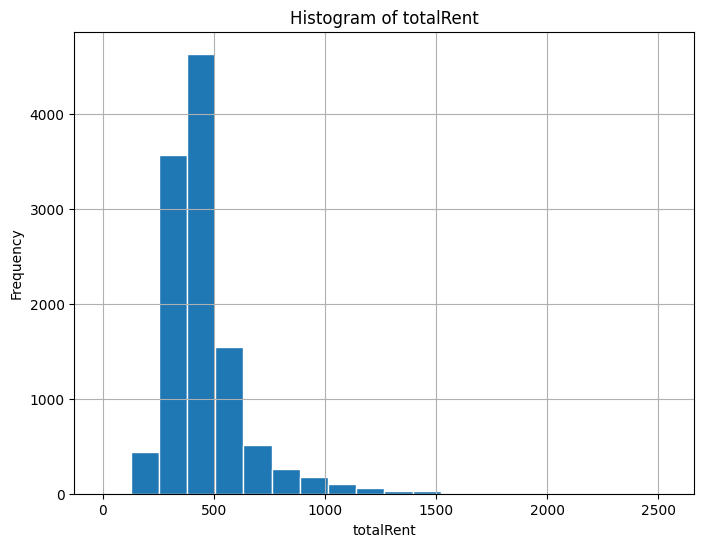

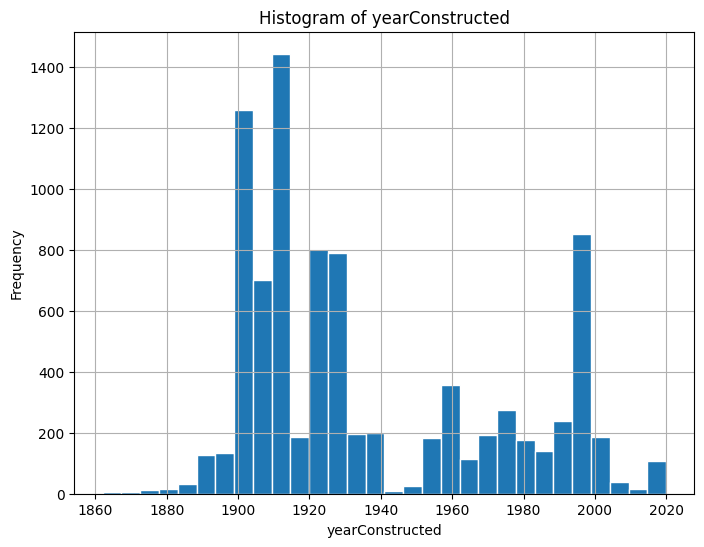

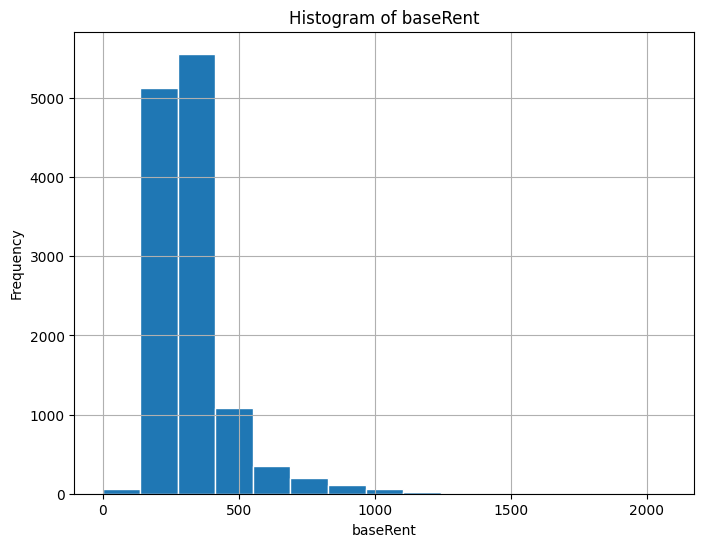

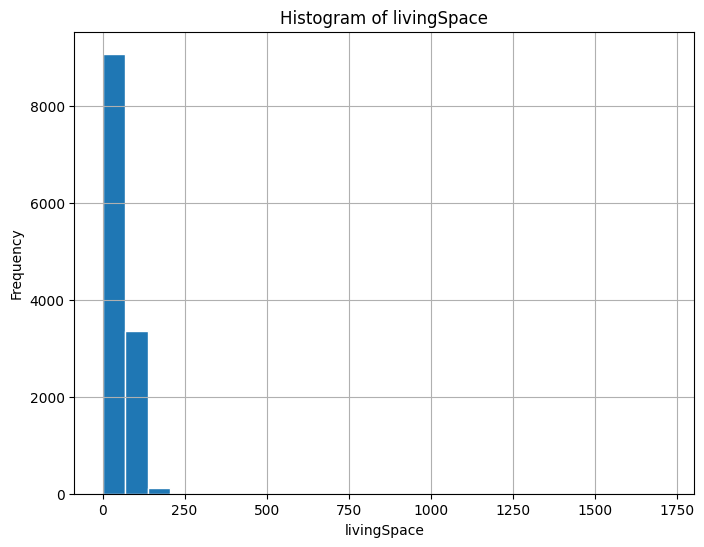

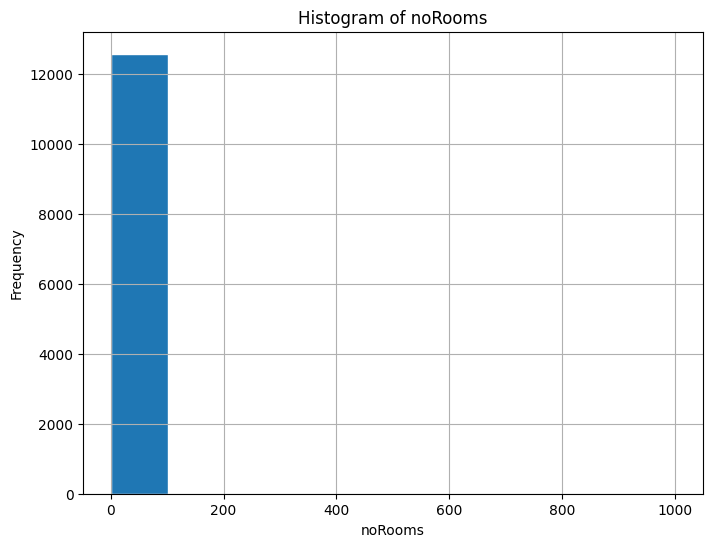

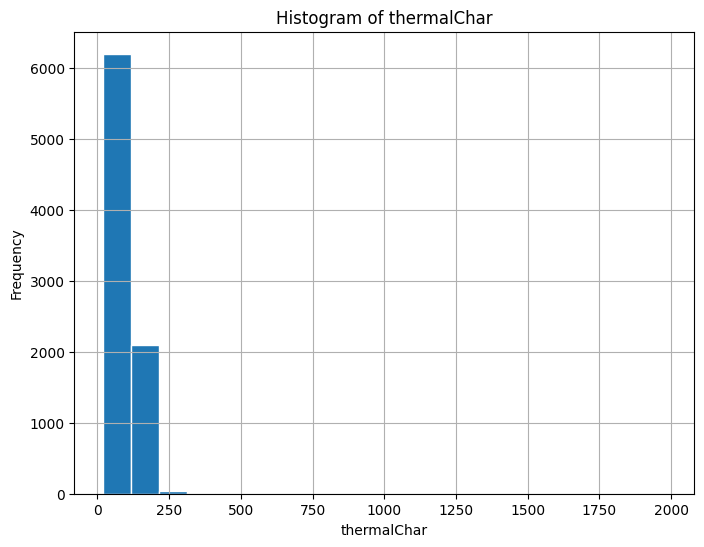

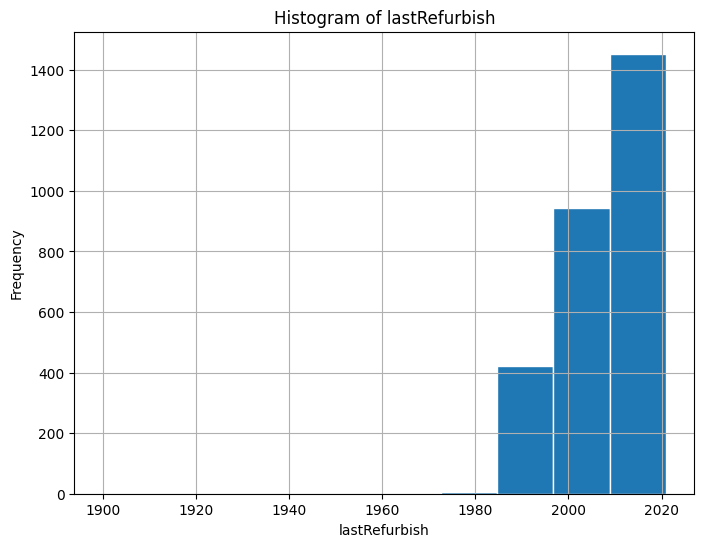

In [45]:
columnsWithNumbers = ['totalRent', 'yearConstructed', 'baseRent', 'livingSpace', 'noRooms', 'thermalChar', 'lastRefurbish']
dynamicBinsForColumns = {
    'totalRent': 20,
    'yearConstructed': 30,
    'baseRent': 15,
    'livingSpace': 25,
    'noRooms': 10,
    'thermalChar': 20,
    'lastRefurbish': 10
}

for _i, columnName in enumerate(columnsWithNumbers):
    plt.figure(figsize=(8, 6))
    plt.hist(chemnitz_in[columnName], bins=dynamicBinsForColumns[columnName], edgecolor='white')
    plt.title(f'Histogram of {columnName}')
    plt.xlabel(columnName)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

##### Boxplot

<Axes: >

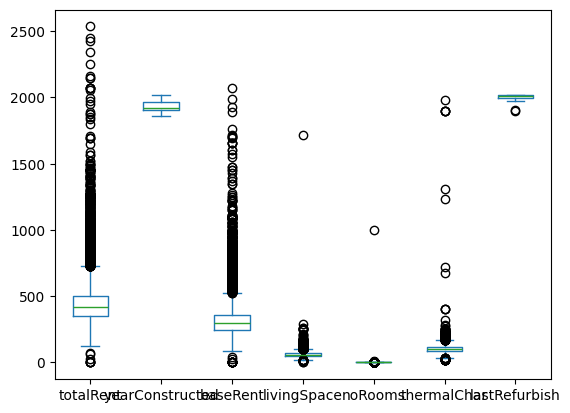

In [55]:
chemnitz_in[columnsWithNumbers].plot(kind="box")

##### Scatter

array([[<Axes: xlabel='totalRent', ylabel='totalRent'>,
        <Axes: xlabel='yearConstructed', ylabel='totalRent'>,
        <Axes: xlabel='baseRent', ylabel='totalRent'>,
        <Axes: xlabel='livingSpace', ylabel='totalRent'>,
        <Axes: xlabel='noRooms', ylabel='totalRent'>,
        <Axes: xlabel='thermalChar', ylabel='totalRent'>,
        <Axes: xlabel='lastRefurbish', ylabel='totalRent'>],
       [<Axes: xlabel='totalRent', ylabel='yearConstructed'>,
        <Axes: xlabel='yearConstructed', ylabel='yearConstructed'>,
        <Axes: xlabel='baseRent', ylabel='yearConstructed'>,
        <Axes: xlabel='livingSpace', ylabel='yearConstructed'>,
        <Axes: xlabel='noRooms', ylabel='yearConstructed'>,
        <Axes: xlabel='thermalChar', ylabel='yearConstructed'>,
        <Axes: xlabel='lastRefurbish', ylabel='yearConstructed'>],
       [<Axes: xlabel='totalRent', ylabel='baseRent'>,
        <Axes: xlabel='yearConstructed', ylabel='baseRent'>,
        <Axes: xlabel='baseRent', 

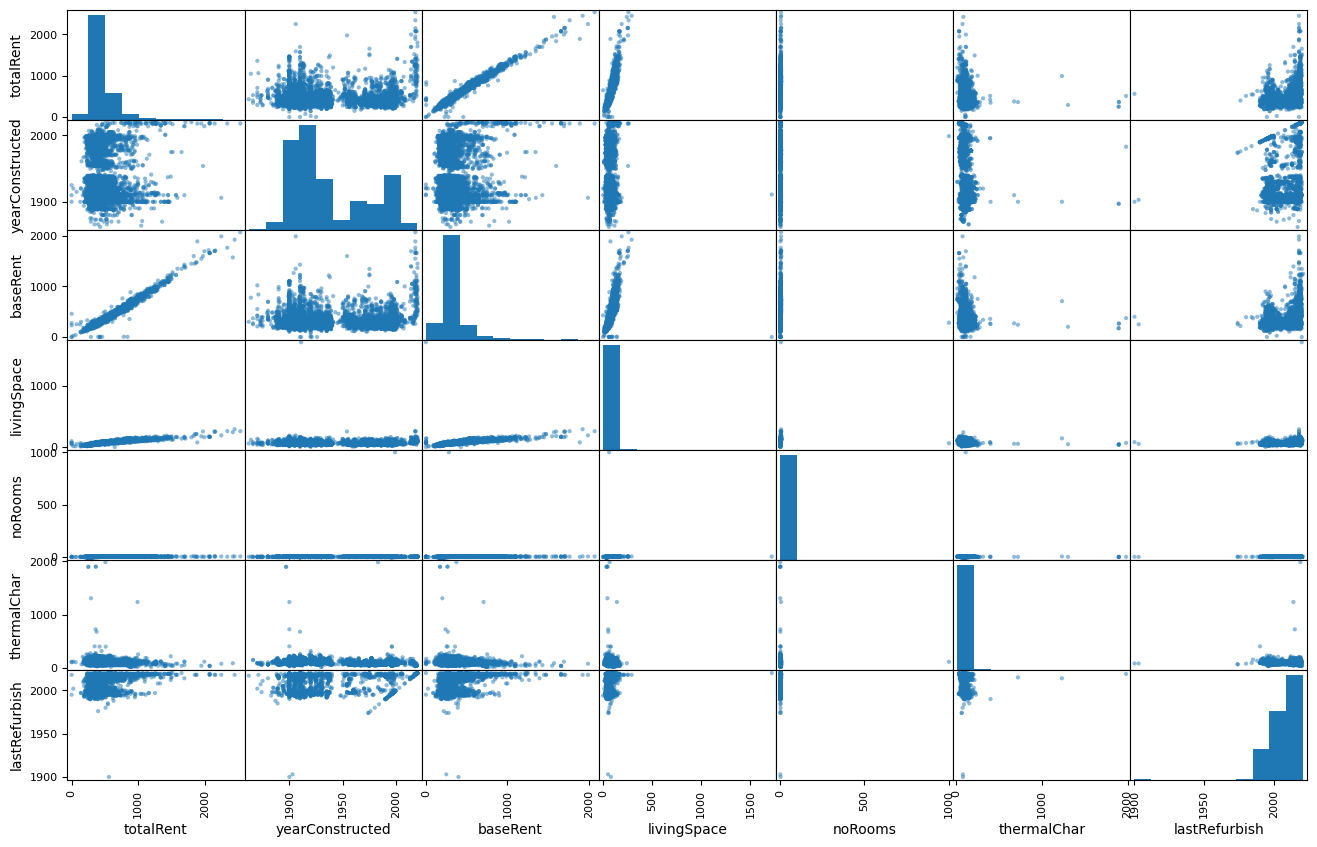

In [56]:
pd.plotting.scatter_matrix(chemnitz_in[columnsWithNumbers], figsize=(16,10))

##### Heatmap

In [58]:
%pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 3.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


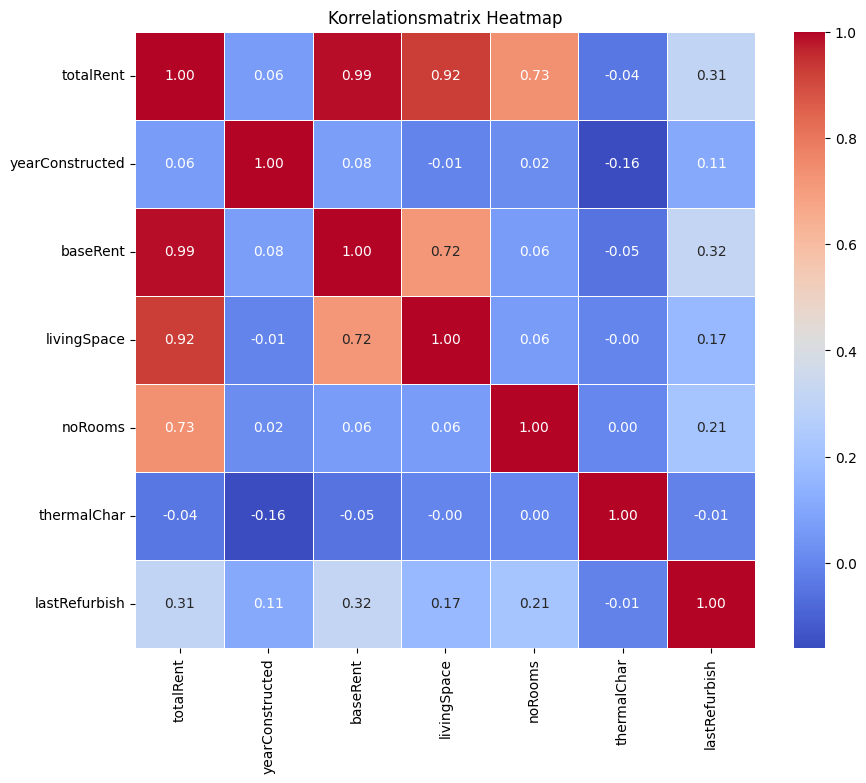

In [59]:
import seaborn as sns

# Berechne die Korrelationsmatrix
correlation_matrix = chemnitz_in[columnsWithNumbers].corr()

# Erstelle die Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korrelationsmatrix Heatmap')
plt.show()
